In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
Traindata = pd.read_csv('trainRegression.csv') 
Testdata = pd.read_csv('testRegression.csv')

In [4]:
print(Traindata.head())
print(Testdata.head())

      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802
     X      R
0  0.0 -0.226
1  0.1 -0.174
2  0.2  0.459
3  0.3  0.638
4  0.4  0.869


In [5]:
Traindata.shape

(283, 2)

In [6]:
Testdata.shape

(32, 2)

In [7]:
input = Traindata['X']
output = Traindata['R']
input, output

(0      0.01
 1      0.02
 2      0.03
 3      0.04
 4      0.05
        ... 
 278    3.09
 279    3.11
 280    3.12
 281    3.13
 282    3.14
 Name: X, Length: 283, dtype: float64,
 0     -0.27300
 1     -0.11700
 2     -0.30900
 3      0.03060
 4     -0.08020
         ...   
 278    0.35600
 279    0.00649
 280    0.27600
 281    0.21000
 282    0.32200
 Name: R, Length: 283, dtype: float64)

In [8]:
input_array = np.array(input)
output_array = np.array(output)
input_array, output_array

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.11, 0.12,
        0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.21, 0.22, 0.23, 0.24,
        0.25, 0.26, 0.27, 0.28, 0.29, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36,
        0.37, 0.38, 0.39, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
        0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.61,
        0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.71, 0.72, 0.73,
        0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85,
        0.86, 0.87, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.21, 1.22,
        1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.31, 1.32, 1.33, 1.34,
        1.35, 1.36, 1.37, 1.38, 1.39, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46,
        1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58,
        1.59, 1.61, 1.62, 1.63, 1.64, 

In [9]:
Length_Train = len(Traindata['X'])
Length_Test = len(Testdata['X'])
print(Length_Train, Length_Test)

283 32


In [10]:
Total_input = sum(np.array(input_array))
print(Total_input)

444.95


In [11]:
Square_input = sum((input_array**2))
print(Square_input)

932.7465000000004


In [12]:
Cube_input = sum((input_array**3))
print(Cube_input)

2199.781025


In [13]:
Quad_input = sum((input_array**4))
print(Quad_input)

5533.852576769998


In [14]:
A_Matrix = [[Length_Train+1, Total_input,Square_input ],[Total_input,Square_input, Cube_input],[Square_input, Cube_input, Quad_input]]
print(A_Matrix)

[[284, 444.95, 932.7465000000004], [444.95, 932.7465000000004, 2199.781025], [932.7465000000004, 2199.781025, 5533.852576769998]]


In [15]:
A_Inverse = np.linalg.inv(A_Matrix)
print(A_Inverse)

[[ 0.03083807 -0.03923034  0.01039674]
 [-0.03923034  0.067058   -0.02004407]
 [ 0.01039674 -0.02004407  0.00639609]]


In [16]:
Total_output=sum(np.array(output))
Product_Output=np.sum(np.dot(output_array,input_array))
Square_Product_output = np.sum(output_array * (input_array ** 2)) 
Total_output, Product_Output, Square_Product_output

(1.3908700000000231, -126.64142949999993, -378.875689549)

In [17]:
B_Matrix = [[Total_output],[Product_Output], [Square_Product_output]]
B_Matrix

[[1.3908700000000231], [-126.64142949999993], [-378.875689549]]

In [18]:
Unknown = np.dot(A_Inverse,B_Matrix)
Unknown

array([[ 1.0720041 ],
       [-0.95267274],
       [ 0.12954585]])

In [19]:
Prediction = Unknown[0] + Unknown[1] * Traindata['X'] + Unknown[2] * (Traindata['X']**2)
Prediction

0      1.062490
1      1.053002
2      1.043541
3      1.034104
4      1.024694
         ...   
278   -0.634838
279   -0.637828
280   -0.639284
281   -0.640714
282   -0.642118
Name: X, Length: 283, dtype: float64

In [56]:
MSE_training=(1/Length_Train)* np.sum((Prediction-Traindata["R"])**2)
print(MSE_training)

0.2883997807255235


In [25]:
MAE = (np.sum(np.absolute(Prediction - Traindata["R"])))
print(MAE)

129.401351261817


In [ ]:


plt.scatter(Traindata['X'], Traindata['R'],color = 'green' ,label='Example Points')
plt.plot(Traindata["X"], Prediction, color='red', label='Regression line')
plt.plot(Traindata['X'],Traindata['R'],'*')

plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.title('Quadratic Regression for Training Data')
plt.show()


In [57]:
Prediction_Test = Unknown[0] + (Unknown[1] * Testdata['X']) + (Unknown[2] * (Testdata['X']**2))
print(Prediction_Test)

0     1.072004
1     0.978032
2     0.886651
3     0.797861
4     0.711662
5     0.628054
6     0.547037
7     0.468611
8     0.392775
9     0.319531
10    0.248877
11    0.180815
12    0.115343
13    0.052462
14   -0.007828
15   -0.065527
16   -0.120635
17   -0.173152
18   -0.223078
19   -0.270414
20   -0.315158
21   -0.357311
22   -0.396874
23   -0.433846
24   -0.468226
25   -0.500016
26   -0.529215
27   -0.555823
28   -0.579840
29   -0.601266
30   -0.620101
31   -0.636346
Name: X, dtype: float64


In [59]:
MSE_Testing=(1/Length_Test)* np.sum((Prediction_Test -  Testdata["R"])**2)
print(MSE_Testing)

0.32356689976128106


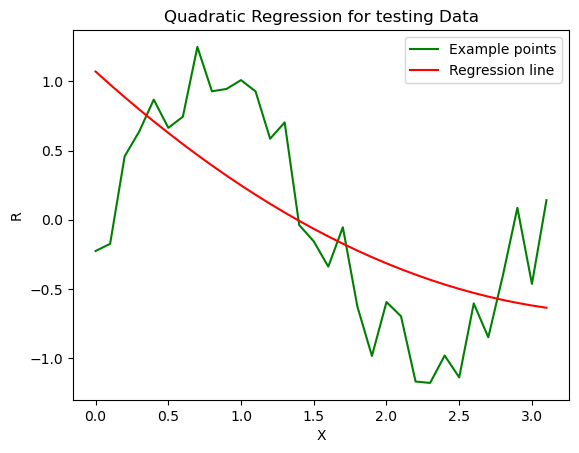

In [60]:
plt.plot(Testdata['X'], Testdata['R'],color = 'green', label='Example points')

# Plot the regression line
plt.plot(Testdata["X"], Prediction_Test, color='red', label='Regression line')

plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.title('Quadratic Regression for testing Data')
plt.show()

In [55]:
print("MSE for Training data is:    ", MSE_training)
print("MSE for Testing data is:      ", MSE_Testing)


MSE for Training data is:     0.2883997807255235
MSE for Testing data is:       0.32356689976128106


In [ ]:
By observing mean square error(MSE) on training data and testing data, we concluded that model performs better on training data as MSE of training data is lesser than Testing data.